Import the relevant files and get a first look and analysis at the bom_df data set

In [602]:
#Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [603]:
# Read the file into the notebook
bom_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [604]:
# Get a first look at the Data
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [605]:
bom_df.shape

(3387, 5)

In [606]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The foreign_gross column is missing data and it is also not in numeric form as it should be, those are the first few things we will address. It is in the object data type in part because it has some 'NaN'. Now we must analyze the data set and then decide how best to deal with this missing data. 

In [607]:
bom_df['foreign_gross'].tail()

3382    NaN
3383    NaN
3384    NaN
3385    NaN
3386    NaN
Name: foreign_gross, dtype: object

In [608]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [609]:
# Check to see how many na is in the foreign gross column
bom_df['foreign_gross'].isna().sum()

1350

In [610]:
# Get rid of the missing data
bom_df.dropna(subset=['foreign_gross'],inplace=True)

In [611]:
# Check to see that it worked
bom_df['foreign_gross'].isna().sum()

0

I decided it would be best to drop the empty rows as I did not want to manipulate or possibly skew the data by using the mean or median. Next I would like to convert the column 'foreign_gross' to numeric form.

In [612]:
num_list=[]
for num in bom_df['foreign_gross']:
    x=num.replace(',','')
    y=float(x)
    num_list.append(y)

In [613]:
print(num_list)

[652000000.0, 691300000.0, 664300000.0, 535700000.0, 513900000.0, 398000000.0, 311500000.0, 391000000.0, 291600000.0, 277300000.0, 330000000.0, 311300000.0, 275400000.0, 228000000.0, 182500000.0, 245600000.0, 222400000.0, 173500000.0, 216400000.0, 187900000.0, 162200000.0, 240100000.0, 166800000.0, 175200000.0, 193000000.0, 210700000.0, 171400000.0, 109400000.0, 185500000.0, 81000000.0, 194600000.0, 137700000.0, 128000000.0, 106000000.0, 152100000.0, 111200000.0, 124000000.0, 101300000.0, 108600000.0, 92800000.0, 100000000.0, 54500000.0, 51200000.0, 86200000.0, 116900000.0, 62300000.0, 61800000.0, 53600000.0, 84400000.0, 77800000.0, 69300000.0, 90400000.0, 82300000.0, 35600000.0, 75200000.0, 52600000.0, 35000000.0, 68900000.0, 52400000.0, 52300000.0, 72500000.0, 94300000.0, 70500000.0, 100200000.0, 51100000.0, 48100000.0, 59800000.0, 64200000.0, 30300000.0, 50100000.0, 26100000.0, 13800000.0, 50100000.0, 58200000.0, 63200000.0, 37800000.0, 43900000.0, 26100000.0, 40000000.0, 75600000.0

In [614]:
bom_df['foreign_gross']=num_list

Here I will take this column now in numeric form and add it to the domestic_gross column in a new column, named total_gross

In [615]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [616]:
# Make a new column called total_gross
bom_df['total_gross']=bom_df['domestic_gross']+bom_df['foreign_gross']

In [617]:
# Check to see that it came through correctly
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


Sort the data in ways to see if there are any specific trends that can prove useful to us.

In [618]:
# Sorted here by year and total gross to look at recent trends
bom_df.sort_values(by=['year','total_gross'],ascending=False)

,title,studio,domestic_gross,foreign_gross,year,total_gross
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08
...,...,...,...,...,...,...
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010,NaN
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010,NaN
302,White Lion,Scre.,NaN,99600.0,2010,NaN
306,Badmaash Company,Yash,NaN,64400.0,2010,NaN


Interesting, I see that there are some empty columns in domestic_gross that need to be dealt with, I will handle that now. Similary to the foreign_gross column, I will get rid of those rows

In [619]:
bom_df['domestic_gross'].isna().sum()

28

In [620]:
bom_df.dropna(subset=['domestic_gross'],inplace=True)

In [621]:
bom_df['domestic_gross'].isna().sum()

0

In [622]:
# sort by total gross and studio to see if there are any studios that appear to be doing best
bom_df=bom_df.sort_values(by=['total_gross','studio'],ascending=False)

In [623]:
bom_df.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


There is something to notice when looking at which studios produce the highest grossing movies. Here we see that BV has 4 of the top 5 highest grossing movies in the dataset and 8 of the TOP 10

Load the Rotten Tomatoes movie_info data frame and see what useful information can be found there.

In [624]:
rt_movieinfo=pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')

In [625]:
rt_movieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


There is a lot of data cleaning that needs to be done before this data is ready to be manipulated, first examine and clean the data.

In [626]:
rt_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [627]:
#There appear to be many useful columns here, lets manipulate the data
rt_movieinfo.sort_values(by=['box_office'],ascending=False)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
207,274,Natalie Portman stars in this western concerni...,R,Action and Adventure|Drama|Western,NaN,NaN,"Jan 29, 2016","Apr 26, 2016",$,"976,847",97 minutes,NaN
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
1323,1711,"Directed by Garry Marshall, The Princess Diari...",G,Comedy|Kids and Family,Garry Marshall,Shonda Rhimes,"Aug 11, 2004","Dec 14, 2004",$,"95,111,012",113 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


The Dtype for box_office is in object form when it should be a float or integer, this is something that must be handled.

In [628]:
new_list=[]
for r in rt_movieinfo['box_office']:
    print(type(r))

<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class '

<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>


In [629]:
# It appears that the numbers are in float form it is just the missing data that we must get rid of before we can
#analyze it
rt_movieinfo.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [630]:
rt_movieinfo.shape

(1560, 12)

We have so few of the data in the box office column as 1220 out of 1560 rows have missing data. This would make it pointless to use that data. However we do have some financial data from the bom_df that we can potentially use. I will try and combine these two data sets and then have enough information to make recommendations. 

In [631]:
# Join the two data bases together
joined_df=rt_movieinfo.join(bom_df,lsuffix=1,rsuffix=2)

In [632]:
joined_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio1,title,studio2,domestic_gross,foreign_gross,year,total_gross
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Toy Story 3,BV,415000000.0,652000000.0,2010.0,1.067000e+09
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,1.025500e+09
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010.0,9.603000e+08
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,Inception,WB,292600000.0,535700000.0,2010.0,8.283000e+08
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,Shrek Forever After,P/DW,238700000.0,513900000.0,2010.0,7.526000e+08


In [633]:
# Trim some of the columns we don't need off of the data set
joined_df=joined_df.drop(['currency','box_office','studio1','synopsis'],axis=1)

In [634]:
joined_df.head()

,id,rating,genre,director,writer,theater_date,dvd_date,runtime,title,studio2,domestic_gross,foreign_gross,year,total_gross
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Toy Story 3,BV,415000000.0,652000000.0,2010.0,1.067000e+09
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,1.025500e+09
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010.0,9.603000e+08
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes,Inception,WB,292600000.0,535700000.0,2010.0,8.283000e+08
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes,Shrek Forever After,P/DW,238700000.0,513900000.0,2010.0,7.526000e+08


In [635]:
# Look at the new data set more in depth
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1560 non-null   int64  
 1   rating          1557 non-null   object 
 2   genre           1552 non-null   object 
 3   director        1361 non-null   object 
 4   writer          1111 non-null   object 
 5   theater_date    1201 non-null   object 
 6   dvd_date        1201 non-null   object 
 7   runtime         1530 non-null   object 
 8   title           1126 non-null   object 
 9   studio2         1124 non-null   object 
 10  domestic_gross  1126 non-null   float64
 11  foreign_gross   1126 non-null   float64
 12  year            1126 non-null   float64
 13  total_gross     1126 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 170.8+ KB


In [636]:
joined_df.shape

(1560, 14)

In [637]:
joined_df=joined_df.sort_values(by=['total_gross'],ascending=False)

In [638]:
joined_df.head()

,id,rating,genre,director,writer,theater_date,dvd_date,runtime,title,studio2,domestic_gross,foreign_gross,year,total_gross
727,934,NR,Classics|Mystery and Suspense,NaN,John Krafft,"Oct 28, 1936","Mar 15, 2005",70 minutes,Marvel's The Avengers,BV,623400000.0,895500000.0,2012.0,1.518900e+09
328,430,PG,Drama|Science Fiction and Fantasy,NaN,Robert Bailey,NaN,NaN,88 minutes,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011.0,1.341500e+09
1127,1453,PG-13,Comedy|Romance,NaN,NaN,"Jun 1, 1989","Nov 3, 2009",119 minutes,Frozen,BV,400700000.0,875700000.0,2013.0,1.276400e+09
1128,1454,R,Comedy,NaN,Kimi Peck|Dalene Young,NaN,NaN,95 minutes,Iron Man 3,BV,409000000.0,805800000.0,2013.0,1.214800e+09
329,432,PG-13,Comedy,NaN,NaN,"Jun 29, 2001","Nov 27, 2001",70 minutes,Transformers: Dark of the Moon,P/DW,352400000.0,771400000.0,2011.0,1.123800e+09


In [639]:
#Check to see how much missing data there is per column
joined_df.isna().sum()

id                  0
rating              3
genre               8
director          199
writer            449
theater_date      359
dvd_date          359
runtime            30
title             434
studio2           436
domestic_gross    434
foreign_gross     434
year              434
total_gross       434
dtype: int64

In [640]:
# Drop all the missing data from the data set 
joined_df=joined_df.dropna()

In [641]:
joined_df.isna().sum()

id                0
rating            0
genre             0
director          0
writer            0
theater_date      0
dvd_date          0
runtime           0
title             0
studio2           0
domestic_gross    0
foreign_gross     0
year              0
total_gross       0
dtype: int64

In [642]:
joined_df.head()

,id,rating,genre,director,writer,theater_date,dvd_date,runtime,title,studio2,domestic_gross,foreign_gross,year,total_gross
728,935,R,Comedy,David Hillenbrand|Scott Hillenbrand,"Patrick Casey|Joshua ""Worm"" Miller","Dec 4, 2009","Apr 27, 2010",92 minutes,Skyfall,Sony,304400000.0,804200000.0,2012.0,1.108600e+09
729,936,PG-13,Drama|Romance,Craig Bolotin,Craig Bolotin,"Jun 1, 1993","Feb 9, 1994",89 minutes,The Dark Knight Rises,WB,448100000.0,636800000.0,2012.0,1.084900e+09
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Toy Story 3,BV,415000000.0,652000000.0,2010.0,1.067000e+09
330,433,PG-13,Action and Adventure|Mystery and Suspense,Doug Liman,Tony Gilroy|William Blake Herron,"Jun 14, 2002","Jan 21, 2003",117 minutes,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011.0,1.045700e+09
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,1.025500e+09


In [643]:
joined_df.shape

(637, 14)

In [644]:
# Get the mean of the total gross and split it up by movie rating
rating_mean=joined_df.groupby(by=joined_df['rating']).mean()
rating_mean
rating_mean=rating_mean.drop(['id','domestic_gross','foreign_gross','year'],axis=1)
rating_mean=rating_mean.reset_index()

In [645]:
rating_mean.reset_index(inplace=True)
rating_mean
colors=[0,10,20,30,40,50]

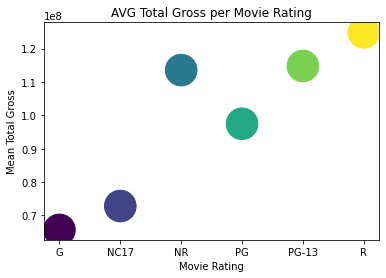

In [646]:
# Plot this data to get a visual idea of which rated movies do better
fig, ax = plt.subplots()
ax.scatter(x=rating_mean['rating'],y=rating_mean['total_gross'],c=colors,s=1000)
ax.set_xlabel('Movie Rating')
ax.set_ylabel('Mean Total Gross')
ax.set_title('AVG Total Gross per Movie Rating');

In [647]:
#Now examine the Max total gross per rating to see if there is any discrepancies
rating_max=joined_df.groupby(by=joined_df['rating']).max()

In [648]:
rating_max=rating_max.drop(['genre','director','writer','theater_date','dvd_date','runtime','title','studio2'],axis=1)

In [649]:
rating_max=rating_max.reset_index()
rating_mean

,index,rating,total_gross
0,0,G,6.564172e+07
1,1,NC17,7.280000e+07
2,2,NR,1.135600e+08
3,3,PG,9.747443e+07
4,4,PG-13,1.147975e+08
5,5,R,1.249086e+08


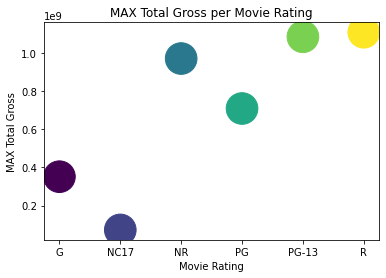

In [650]:
# Now with the Max total gross per movie rating we can visualize the possible ceiling of each movie rating
fig, ax = plt.subplots()
ax.scatter(x=rating_max['rating'],y=rating_max['total_gross'],c=colors,s=1000)
ax.set_xlabel('Movie Rating')
ax.set_ylabel('MAX Total Gross')
ax.set_title('MAX Total Gross per Movie Rating');

In [12]:
tmdbmovies= pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdbmovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
tnmovie_budgets= pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
Production_budget=tnmovie_budgets['production_budget']
production_budget_list=[]
for num in Production_budget:
    a= num.replace(',','')
    b= a.replace('$','')
    production_budget_list.append(int(b))


In [23]:
worldwide_gross= tnmovie_budgets['worldwide_gross']
worldwide_gross_list=[]
for num in worldwide_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    worldwide_gross_list.append(int(b))


In [29]:
domestic_gross= tnmovie_budgets['domestic_gross']
domestic_gross_list=[]
for num in domestic_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    worldwide_gross_list.append(int(b))

In [30]:
fig, (ax) = plt.subplots()
ax.scatter(production_budget_list, worldwide_gross_list)
ax.set_title('worldwide')

In [31]:
#fig, (ax) = plt.subplots()
#ax.set_title('domestic')